In [34]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
url = 'https://github.com/matisolica/Proyecto-final-DS1/raw/bd6cb31c2509e8c662132e43d728f7f5bcd364f5/Matias%20Isolica%20Dataset%20-%20Ausentismo%20y%20coberturas%20Enfermeria%202023.xlsx'
dbexcel = pd.read_excel(url, sheet_name=None)

In [35]:
#printeo los nombres de las hojas del xlsx
print(dbexcel.keys())

dict_keys(['Tb_Coberturas', 'Tb_Ausentismo', 'Tb_Nomina', 'Tb_Motivos', 'Tb_FormaDeCobertura', 'Tb_Turnos', 'Tb_Servicios', 'Tb_Categorias', 'Tb_Localidades'])


In [36]:
#asigno nombre de variable a cada hoja del xlsx
df_cob = dbexcel['Tb_Coberturas'] #Muestra las coberturas generadas en función del ausentismo
df_aus = dbexcel['Tb_Ausentismo'] #Muestra los colaboradores que se ausentaron
df_nom = dbexcel['Tb_Nomina'] #Muestra la nómina de colaboradores
df_mot = dbexcel['Tb_Motivos'] #Muestra los motivos nominalizados de ausencia
df_formcob = dbexcel['Tb_FormaDeCobertura'] #Muestra las formas de cobertura existentes
df_tur = dbexcel['Tb_Turnos'] #Muestra los turnos existentes
db_ser = dbexcel['Tb_Servicios'] #Muestra los servicios asistenciales existentes en el sanatorio
db_cat = dbexcel['Tb_Categorias'] #Muestra las categorías profesionales existentes en la estructura de Enfermería
db_loc = dbexcel['Tb_Localidades'] #Muestra las localidades en las que al menos un colaborador reside

In [37]:
#Visualizar el encabezado del df_cob
df_cob.head()

,ID,FormaDeCoberturaID,Legajo_Reemplazo,Cant_Hs,TurnoID2
0,1,6,NaN,7.0,NaN
1,2,6,NaN,7.0,NaN
2,3,6,NaN,7.0,NaN
3,4,6,NaN,7.0,NaN
4,5,4,7942.0,7.0,4.0


In [38]:
#Visualizar el df df_formcob
df_formcob

,FormaDeCoberturaID,FormaDeCobertura
0,1,Banco de Horas
1,2,Cambio de Guardia
2,3,Cambio de Turno
3,4,Horas Extras
4,5,Plus x Referente
5,6,Sin Cobertura
6,7,Transferencia


In [48]:
#Joinear los df df_cob y df_formcob. Luego creo df_cob_grouped con las categorías no normalizadas y sumando el total de horas por categoría en el año

df_cob_merged = df_cob.merge(df_formcob, on='FormaDeCoberturaID')
df_cob_grouped = df_cob_merged.groupby('FormaDeCobertura')['Cant_Hs'].sum().reset_index()
print(df_cob_grouped)

     FormaDeCobertura  Cant_Hs
0      Banco de Horas   6988.0
1  Cambio de Guardia    8995.0
2     Cambio de Turno   2429.5
3        Horas Extras  34403.0
4    Plus x Referente   3409.5
5       Sin Cobertura  25944.5
6       Transferencia   2400.0


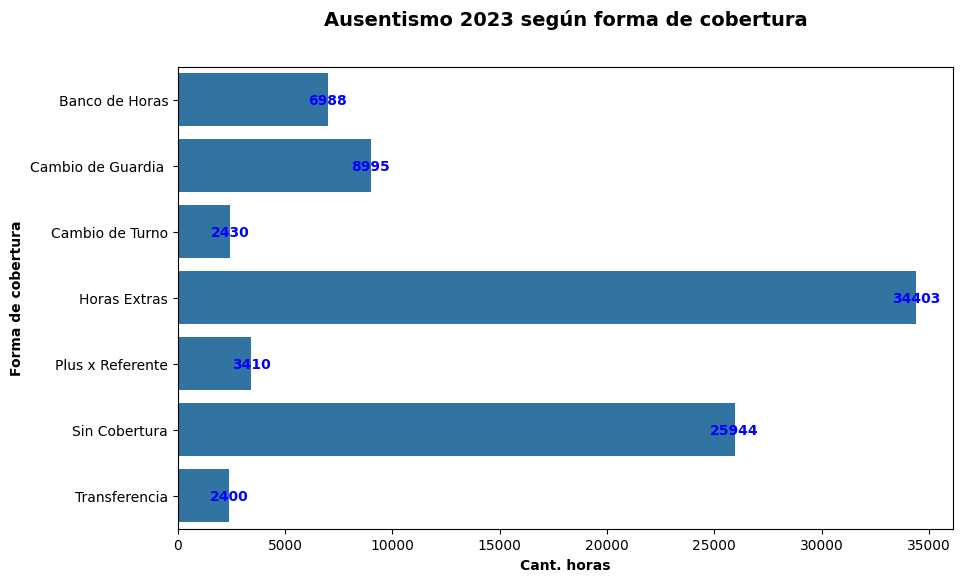

In [77]:
# Grafico 1 MatPlotLib - Ausentismo 2023 según forma de cobertura

plt.figure(figsize=(10,6))
sns.barplot(y = 'FormaDeCobertura', x = 'Cant_Hs', data = df_cob_grouped)
plt.title("Ausentismo 2023 según forma de cobertura", 
             fontsize = 14, fontweight = 'bold', pad = 30)
plt.xlabel('Cant. horas', fontsize = 10, fontweight = 'bold')
plt.ylabel('Forma de cobertura', fontsize = 10, fontweight = 'bold')
ax = plt.gca() #obtengo el eje
for p in ax.patches: #ax.patches obtengo las barras
    valores = p.get_width() #obtengo el valor de la barra
    ax.text(valores + 5, p.get_y() + p.get_height()/2, f'{valores:.0f}', #agrega texto (valores) al grafico y posiciono los valores verticalmente en el centro de la barra
            ha = 'center', va = 'center', fontsize = 10, fontweight = 'bold', color = 'blue')

plt.show()



In [ ]:
#Grafico radar 5 turnos con extras?